### Quantum Amplitude Amplification

Quantum Amplitude Amplification (QAA) is a powerful quantum algorithm that generalizes Grover's search algorithm, providing a foundation for various quantum algorithms that offer speedups over their classical counterparts. QAA can amplify the probability amplitude of desired outcomes, making it an essential tool in the quantum computing toolkit.

Quantum Amplitude Amplification enhances the probability of finding the correct answer in an unsorted database or solving complex computational problems. While Grover's algorithm is a specific application for unstructured search problems, QAA can be applied to a broader range of problems, including optimization and machine learning.

QAA offers a quadratic speedup over classical algorithms for search and optimization problems. If a classical algorithm requires  O(N) operations, QAA can achieve the same result in O(√N) operations.

Unlike Grover's algorithm, which is tailored for search problems, QAA is more versatile and can be adapted to various problems by defining appropriate oracle and diffusion operators.

Many quantum algorithms, such as Quantum Approximate Optimization Algorithm (QAOA) and Quantum Machine Learning algorithms, build upon the principles of QAA.

The oracle operator, 𝑂 is a unitary operator that marks the desired state ∣w⟩. It is defined as
$$
\begin{cases}
-|x\rangle & \text{if } x = w (target state) \\
|x\rangle & \text{if } x \neq w
\end{cases}
$$

This describes the desired outcome after applying the quantum amplitude amplification algorithm. We want the amplitude of the target state (denoted by $w$ here) to be amplified, while the amplitudes of all other states remain unchanged or are suppressed.

#### Diffusion Operator

The diffusion operator, $ \mathcal{D} $, inverts the amplitude of all states about the mean. It is defined as:
$$
\mathcal{D} = 2|\psi\rangle\langle\psi| - I
$$
where $ |\psi\rangle $ is the equal superposition state:
$$
|\psi\rangle = \frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} |x\rangle
$$

In quantum amplitude amplification, the diffusion operator acts to spread out the amplitudes of all states towards the equal superposition state (where all basis states have the same amplitude). This is a crucial step in amplifying the target state.

#### Grover's Iteration

One iteration of the Grover operator, $ G $, is given by:
$$
G = \mathcal{D} \mathcal{O}
$$
where $\mathcal{O}$ is the oracle operator that identifies the target state.

After $ k $ iterations, the state $ |\psi\rangle $ evolves as:
$$
G^k |\psi\rangle
$$

By repeatedly applying the Grover operator (which combines the diffusion and oracle operations), the amplitude of the target state is amplified, allowing for a higher probability of finding it during measurement. This significantly improves search efficiency compared to classical algorithms for certain problems.


In [2]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import GroverOperator
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Define the oracle for the desired state (let's say we want to find state |11>)
def oracle():
    qc = QuantumCircuit(2)
    qc.cz(0, 1)
    return qc

In [4]:
# Define the diffusion operator (Grover operator)
def diffusion_operator():
    qc = QuantumCircuit(2)
    qc.h([0, 1])
    qc.z([0, 1])
    qc.cz(0, 1)
    qc.h([0, 1])
    return qc

In [5]:
# Create the quantum circuit for QAA
qc = QuantumCircuit(2, 2)
qc.h([0, 1])  # Apply Hadamard gates to initialize in superposition

In [7]:
# Apply the oracle and diffusion operators
oracle_circuit = oracle()
diffusion_circuit = diffusion_operator()
grover_operator = GroverOperator(oracle_circuit)

qc.append(grover_operator, [0, 1])
qc.append(diffusion_circuit, [0, 1])

In [8]:
# Add measurements
qc.measure([0, 1], [0, 1])

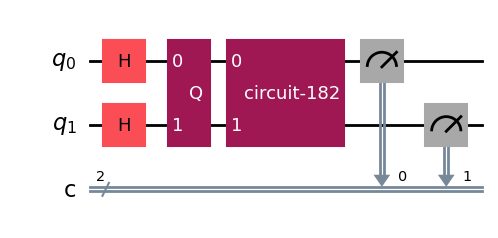

In [9]:
# Draw the circuit
qc.draw('mpl')
plt.show()

In [10]:
# Use AerSimulator to simulate the circuit
simulator = AerSimulator()
qc = transpile(qc, simulator)
result = simulator.run(qc, shots=1024).result()

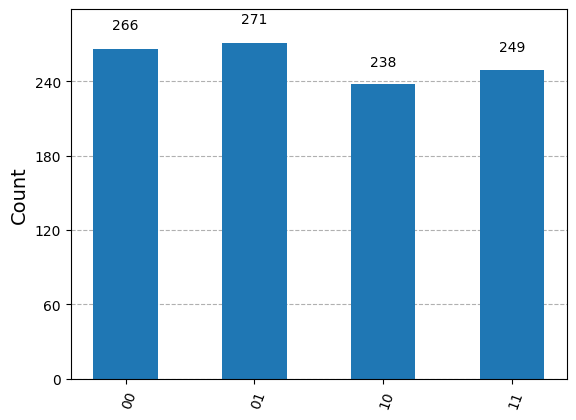

In [11]:
# Get and plot the results
counts = result.get_counts(qc)
plot_histogram(counts)
plt.show()